# Score Probabilities by Type

Examine the distribution of scores for various score types.

## Preliminaries

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde as gkde
import sqlite3

In [3]:
DBFILE = 'CarcassonneScore-sample.db'

In [4]:
conn = sqlite3.connect(DBFILE)
cur = conn.cursor()

In [5]:
scoretypes = [x[0] for x in cur.execute('SELECT DISTINCT scoretype FROM scores').fetchall()]
print("Analyzing score types: " + ', '.join(scoretypes))

Analyzing score types: City, Road, Monastery, Meadow


In [6]:
maxscore = cur.execute('SELECT points FROM scores ORDER BY points DESC LIMIT 1;').fetchall()[0][0]

In [7]:
scorerange = np.arange(0, maxscore*1.2)

## Look at PDF of Score by Type of Score

### All games and all scores

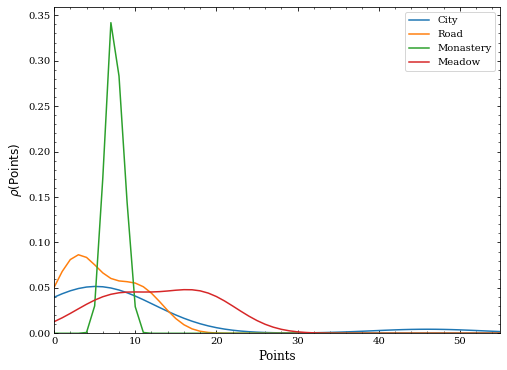

In [8]:
cmdbase = "SELECT points FROM scores WHERE scoretype='"

fig, ax = plt.subplots(1, 1,
                       figsize=(8,6))

for stype in scoretypes:
    if stype == 'Trade token':
        ax.axvline(10,
                   label='Trade token')
        continue
    scores = cur.execute(cmdbase + stype + "'").fetchall()
    scores = np.array([x[0] for x in scores])
    if len(scores) > 1:
        rhoscores = gkde(scores)
        ax.plot(scorerange,
                rhoscores(scorerange),
                label=stype)
ax.legend(loc='best')
ax.set_xlabel('Points', fontsize='large')
ax.set_ylabel(r'$\rho({\rm Points})$', fontsize='large')
ax.set_xlim([0, scorerange[-1]])
ylim = ax.get_ylim()
ax.set_ylim([0, ylim[1]])
ax.minorticks_on()

### In-game vs. Postgame

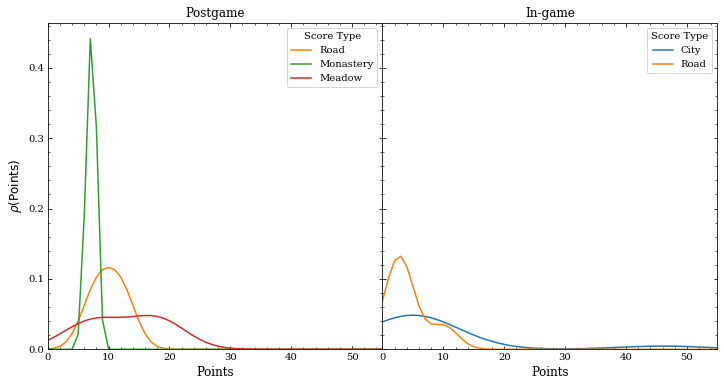

In [9]:
fig, ax = plt.subplots(1, 2,
                       sharex=True, sharey=True,
                       figsize=(12,6))

for stype in scoretypes:
    for ingame in (1, 0):
        if stype == 'Trade token':
            ax[0].axvline(10,
                          label='Trade token')
            continue
        scores = cur.execute(cmdbase + stype + "' AND ingame={0:1.0f}".format(ingame)).fetchall()
        scores = np.array([x[0] for x in scores])
        if len(scores) > 1:
            rhoscores = gkde(scores)
            ax[ingame].plot(scorerange,
                            rhoscores(scorerange),
                            label=stype)
        else:
            ax[ingame].plot(0,0)
ax[0].legend(title='Score Type', loc='best')
ax[1].legend(title='Score Type', loc='best')
ax[1].set_xlabel('Points', fontsize='large')
ax[0].set_xlabel('Points', fontsize='large')
ax[0].set_ylabel(r'$\rho({\rm Points})$', fontsize='large')
ax[0].minorticks_on()
ax[0].minorticks_on()
ax[0].set_title('Postgame')
ax[1].set_title('In-game')
ax[0].set_xlim([0, scorerange[-1]])
ylim = ax[0].get_ylim()
ax[0].set_ylim([0, ylim[1]])
fig.subplots_adjust(wspace=0)

In [10]:
conn.close()